In [1]:

import os
import cv2
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from collections import Counter



In [2]:
train_labels = pd.read_csv('/kaggle/input/raf-db-dataset/train_labels.csv')
test_labels = pd.read_csv('/kaggle/input/raf-db-dataset/test_labels.csv')

label_map = {2: "fear", 4: "happy", 5: "sad", 6: "angry"}

train_labels = train_labels[train_labels["label"].isin(label_map.keys())]
train_labels["label"] = train_labels["label"].map(label_map)
# Display the first few rows of the train labels to check the structure
print(train_labels)

test_labels = test_labels[test_labels["label"].isin(label_map.keys())]
test_labels["label"] = test_labels["label"].map(label_map)
# Display the first few rows of the train labels to check the structure
# test_labels

                        image  label
0     train_00001_aligned.jpg    sad
1     train_00002_aligned.jpg    sad
2     train_00003_aligned.jpg  happy
3     train_00004_aligned.jpg  happy
4     train_00005_aligned.jpg    sad
...                       ...    ...
9392  train_09393_aligned.jpg   fear
9393  train_09394_aligned.jpg   fear
9394  train_09395_aligned.jpg   fear
9395  train_09396_aligned.jpg   fear
9396  train_09397_aligned.jpg   fear

[7740 rows x 2 columns]


In [3]:
label_map = {2: "fear", 4: "happy", 5: "sad", 6: "angry"}


In [4]:
# Load the labels CSV files
train_labels = pd.read_csv('/kaggle/input/raf-db-dataset/train_labels.csv')
test_labels = pd.read_csv('/kaggle/input/raf-db-dataset/test_labels.csv')

# Display the first few rows of the train labels to check the structure
print(train_labels.head())

classes = ['surprise', 'fear', 'disgust', 'happy', 'sad', 'angry', 'neutral']


label_map = {label: (idx+1) for idx, label in enumerate(classes)}

print(label_map)

                     image  label
0  train_00001_aligned.jpg      5
1  train_00002_aligned.jpg      5
2  train_00003_aligned.jpg      4
3  train_00004_aligned.jpg      4
4  train_00005_aligned.jpg      5
{'surprise': 1, 'fear': 2, 'disgust': 3, 'happy': 4, 'sad': 5, 'angry': 6, 'neutral': 7}


In [5]:
import os
import numpy as np
import cv2
from tqdm import tqdm

def load_data(dataset_dir, label_map, excluded_labels, new_label_map):
    images = []
    labels = []
    
    for label, idx in tqdm(label_map.items()):
        if idx in excluded_labels:  # Skip excluded labels
            continue
        
        folder_path = os.path.join(dataset_dir, str(idx))  
        if not os.path.exists(folder_path):
            print(f"Warning: {folder_path} does not exist.")
            continue
        
        for filename in os.listdir(folder_path):
            if not filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue  # Skip non-image files
            
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            
            if img is None:
                print(f"Warning: Unable to read {img_path}")
                continue  # Skip unreadable images
            
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images.append(img_rgb)
            labels.append(new_label_map[idx])  # Assign new label
    
    return np.array(images), np.array(labels)




# Exclude labels 1 (neutral), 2 (happy), and 6 (disgust)
excluded_labels = {1, 3, 7}

# New sequential label mapping
new_label_map = {2: 1, 4: 2, 5: 3, 6: 4}  # Mapping for the remaining labels

# Load train and test datasets
train_images, train_labels = load_data('/kaggle/input/raf-db-dataset/DATASET/train', label_map, excluded_labels, new_label_map)
test_images, test_labels = load_data('/kaggle/input/raf-db-dataset/DATASET/test', label_map, excluded_labels, new_label_map)

# Print dataset distribution after remapping
train_label_counts = Counter(train_labels)
test_label_counts = Counter(test_labels)

print("Train label counts:", train_label_counts)
print("Test label counts:", test_label_counts)
print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)


100%|██████████| 7/7 [00:09<00:00,  1.31s/it]

Train label counts: Counter({2: 4772, 3: 1982, 4: 705, 1: 281})
Test label counts: Counter({2: 1185, 3: 478, 4: 162, 1: 74})
Train images shape: (7740, 100, 100, 3)
Test images shape: (1899, 100, 100, 3)


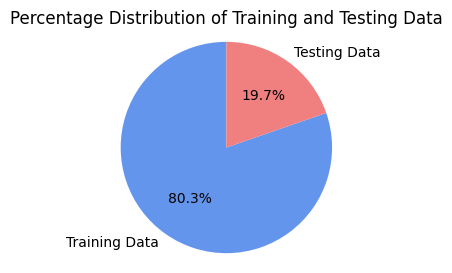

In [6]:
# Calculate the total number of images
total_images = len(train_images) + len(test_images)

# Calculate percentages
train_percentage = (len(train_images) / total_images) * 100
test_percentage = (len(test_images) / total_images) * 100

# Data for pie chart
labels = ['Training Data', 'Testing Data']
sizes = [train_percentage, test_percentage]
colors = ['cornflowerblue', 'lightcoral']

# Plot the pie chart

plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage Distribution of Training and Testing Data')
plt.axis('equal')  
plt.show()

In [7]:
from collections import Counter




In [9]:
X_train = np.concatenate([train_images, test_images], axis=0)
Y_train = np.concatenate([train_labels, test_labels], axis=0)

# Display the shapes to confirm
print(X_train.shape)
print(Y_train.shape)

(9639, 100, 100, 3)
(9639,)


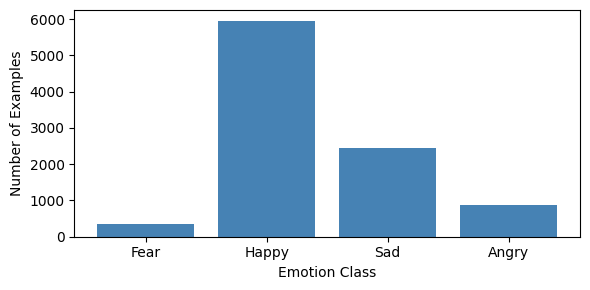

In [10]:
# Count the distribution of classes in the resampled train dataset
train_label_counts_resampled = Counter(Y_train)
    
# Convert to sorted lists for plotting
train_classes_resampled = sorted(train_label_counts_resampled.keys())
train_counts_resampled = [train_label_counts_resampled[cls] for cls in train_classes_resampled]
# Plot the distribution
plt.figure(figsize=(6, 3))
x_labels = [ 'Fear', 'Happy', 'Sad', 'Angry']
    
# Bar plot for the resampled distribution
plt.bar(x_labels, train_counts_resampled, color="steelblue")
    
# Add labels and title
plt.xlabel("Emotion Class")
plt.ylabel("Number of Examples")
plt.title('')
plt.tight_layout()
    
# Show the plot
plt.show()

In [11]:
def plot_class_distribution(y, title):
    # Count the distribution of classes in the resampled train dataset
    train_label_counts_resampled = Counter(y)
    
    # Convert to sorted lists for plotting
    train_classes_resampled = sorted(train_label_counts_resampled.keys())
    train_counts_resampled = [train_label_counts_resampled[cls] for cls in train_classes_resampled]
    
    # Plot the distribution
    plt.figure(figsize=(6, 3))
    x_labels = [ 'Fear', 'Happy', 'Sad', 'Angry']
    
    # Bar plot for the resampled distribution
    plt.bar(x_labels, train_counts_resampled, color="steelblue")
    
    # Add labels and title
    plt.xlabel("Emotion Class")
    plt.ylabel("Number of Examples")
    plt.title(title)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

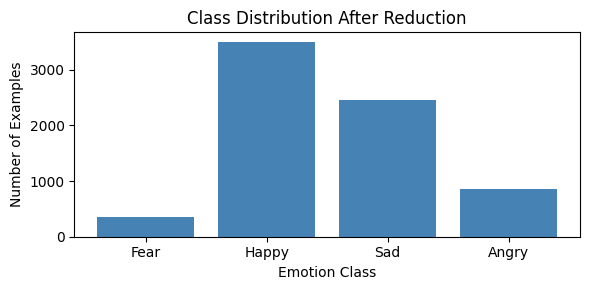

In [12]:
# Function to reduce the size of a specific class in the dataset
def reduce_class(X, y, target_class, target_size):
    # Separate the target class
    class_indices = np.where(y == target_class)[0]
    non_class_indices = np.where(y != target_class)[0]
    
    # Randomly sample the target class to the desired size
    reduced_class_indices = np.random.choice(class_indices, target_size, replace=False)
    
    # Combine the reduced class with the other classes
    final_indices = np.concatenate([reduced_class_indices, non_class_indices])
    X_reduced = X[final_indices]
    y_reduced = y[final_indices]
    
    return X_reduced, y_reduced

target_class = 2  # The 'happy' class
target_size = 3500
X_train_reduced, y_train_reduced = reduce_class(X_train, Y_train, target_class, target_size)
# Plot the new distribution after reduction
plot_class_distribution(y_train_reduced, "Class Distribution After Reduction")

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Classe 1:  has 355 samples  are agumented samples are 3145 .
Classe 3:  has 2460 samples  are agumented samples are 1040 .
Classe 4:  has 867 samples  are agumented samples are 2633 .


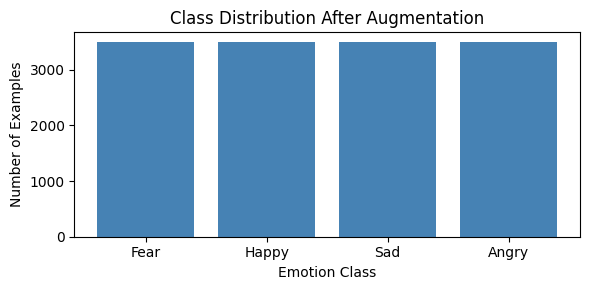

In [14]:
def augment_classes(images, labels, target_counts):
    # Initialisation de la génération d'images augmentées
    datagen = ImageDataGenerator(
        rotation_range=10,             
        width_shift_range=0.1,         
        height_shift_range=0.1,  
        zoom_range=0.1,
        vertical_flip=False,               
        horizontal_flip=True, 
        channel_shift_range=50.0,
        fill_mode='nearest'
    )

    augmented_images = images.copy()  # Nous copions les images pour conserver les originales
    augmented_labels = labels.copy()  # Idem pour les labels

    # Pour chaque classe, nous augmentons le nombre d'échantillons
    for target_class, target_count in target_counts.items():
        # Filtrage des images et labels pour la classe cible
        class_images = images[labels == target_class]
        class_labels = labels[labels == target_class]
        # Calcul du nombre d'échantillons à générer
        augment_count = target_count - len(class_images)

        if augment_count > 0:
            print(f'Classe {target_class}:  has {len(class_images)} samples  are agumented samples are {augment_count} .')

            # Création d'un itérateur pour la classe cible
            class_images_augmented = []
            class_labels_augmented = []

            # Appliquer l'augmentation de manière itérative
            for batch in datagen.flow(class_images, batch_size=1, seed=42):
                aug_image = batch[0].astype(np.uint8)
                class_images_augmented.append(aug_image)
                class_labels_augmented.append(target_class)
                
                # Arrêter quand le nombre souhaité d'images augmentées est atteint
                if len(class_images_augmented) >= augment_count:
                    break
                    # Ajouter les images augmentées au jeu de données original
            augmented_images = np.vstack((augmented_images, np.array(class_images_augmented)))
            augmented_labels = np.hstack((augmented_labels, np.array(class_labels_augmented)))

    return augmented_images, augmented_labels

# Example usage
target_counts = {1: 3500, 3: 3500, 4: 3500, }  # Target counts for each class
X_train_augmented, y_train_augmented = augment_classes(X_train_reduced, y_train_reduced, target_counts)

# Visualize the class distribution after augmentation
plot_class_distribution(y_train_augmented, "Class Distribution After Augmentation")

In [15]:
from sklearn.model_selection import GridSearchCV,train_test_split


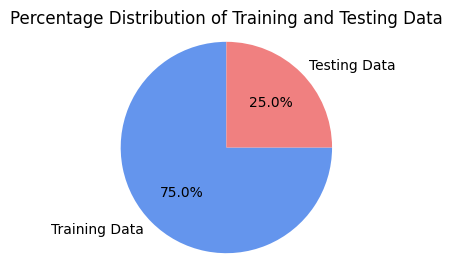

In [16]:
# Split the data into training and testing sets (75% train, 25% test)
X_train, X_test, Y_train, Y_test = train_test_split(X_train_augmented, 
                                                    y_train_augmented, 
                                                    test_size=0.25, 
                                                    shuffle=True,
                                                    random_state=42)

# Calculate the total number of images
total_images = len(X_train) + len(X_test)

# Calculate percentages
train_percentage = (len(X_train) / total_images) * 100
test_percentage = (len(X_test) / total_images) * 100

# Data for pie chart
labels = ['Training Data', 'Testing Data']
sizes = [train_percentage, test_percentage]
colors = ['cornflowerblue', 'lightcoral']

# Plot the pie chart
plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage Distribution of Training and Testing Data')
plt.axis('equal')  
plt.show()

In [17]:
def normalize_images(images):
    # Normalize pixel values to [0, 1]
    return images / 255.0

train_images_normalized = normalize_images(X_train)
test_images_normalized = normalize_images(X_test)

In [18]:
def reshape_images(images, model_type='CNN'):
        return images.reshape((images.shape[0], 100, 100, 3))

train_images_SVMreshaped = reshape_images(train_images_normalized, model_type='SVM')
test_images_SVMreshaped = reshape_images(test_images_normalized, model_type='SVM')

train_images_CNNreshaped = reshape_images(train_images_normalized, model_type='CNN')
test_images_CNNreshaped = reshape_images(test_images_normalized, model_type='CNN')

In [19]:
from tensorflow.keras.utils import to_categorical


In [20]:
# Convert labels to categorical for CNN
Y_train_cat = to_categorical(Y_train - 1, num_classes=len(classes))
Y_test_cat = to_categorical(Y_test - 1, num_classes=len(classes))

In [21]:
datagen = ImageDataGenerator(
    rotation_range=20,             
    width_shift_range=0.1,         
    height_shift_range=0.1,  
    vertical_flip=False,               
    horizontal_flip=True, 
    fill_mode='nearest'
)

# Create the generator for training
train_generator = datagen.flow(train_images_CNNreshaped, Y_train_cat, batch_size=64)

In [22]:
from tensorflow.keras.models import Model, Sequential, save_model

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint



In [23]:
# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(test_images_CNNreshaped[0].shape)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),

    Dense(len(classes), activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 512)           │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,881,991 (18.62 MB)

 Trainable params: 4,881,991 (18.62 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Train the CNN model
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=10, min_delta=0.0001, verbose=1) 
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)  
checkpoint = ModelCheckpoint(filepath='best_CNNModel.keras', monitor='val_accuracy', save_best_only=True, verbose=1) 

CNN_History = cnn_model.fit(
    train_generator,
    epochs=60, 
    batch_size = 32,
    validation_data=(test_images_CNNreshaped, Y_test_cat), 
    callbacks=[reduce_lr, early_stop, checkpoint]
)

Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


164/165 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.3166 - loss: 1.4294
Epoch 1: val_accuracy improved from -inf to 0.44600, saving model to best_CNNModel.keras
165/165 ━━━━━━━━━━━━━━━━━━━━ 35s 172ms/step - accuracy: 0.3171 - loss: 1.4285 - val_accuracy: 0.4460 - val_loss: 1.2351 - learning_rate: 0.0010
Epoch 2/60
164/165 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.4098 - loss: 1.2662
Epoch 2: val_accuracy improved from 0.44600 to 0.50686, saving model to best_CNNModel.keras
165/165 ━━━━━━━━━━━━━━━━━━━━ 24s 142ms/step - accuracy: 0.4099 - loss: 1.2660 - val_accuracy: 0.5069 - val_loss: 1.1310 - learning_rate: 0.0010
Epoch 3/60
164/165 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.4750 - loss: 1.1803
Epoch 3: val_accuracy improved from 0.50686 to 0.62771, saving model to best_CNNModel.keras
165/165 ━━━━━━━━━━━━━━━━━━━━ 23s 136ms/step - accuracy: 0.4754 - loss: 1.1798 - val_accuracy: 0.6277 - val_loss: 0.9078 - learning_rate: 0.0010
Epoch 4/60
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s

In [25]:
CNN_History.history.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

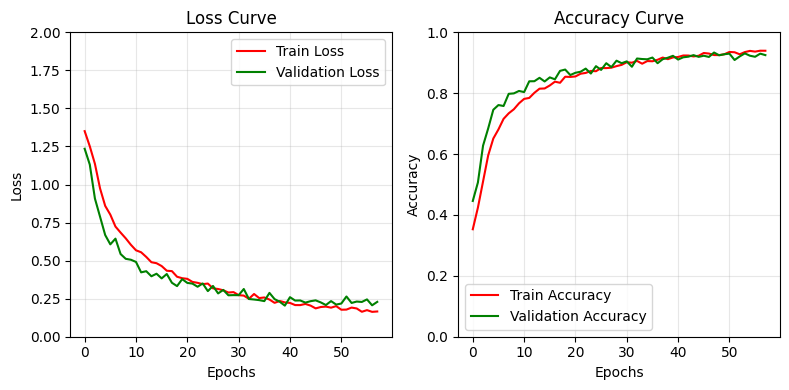

In [26]:
train_loss = CNN_History.history['loss']
val_loss = CNN_History.history['val_loss']
train_accuracy = CNN_History.history['accuracy']
val_accuracy = CNN_History.history['val_accuracy']

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].plot(train_loss, label='Train Loss', color='red')
ax[0].plot(val_loss, label='Validation Loss', color='green')
ax[0].set_title('Loss Curve')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].set_ylim([0, 2])
ax[0].grid(alpha=0.3)

ax[1].plot(train_accuracy, label='Train Accuracy', color='red')
ax[1].plot(val_accuracy, label='Validation Accuracy', color='green')
ax[1].set_title('Accuracy Curve')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].set_ylim([0, 1])
ax[1].grid(alpha=0.3)

# Ajuster l'espacement entre les sous-graphes
plt.tight_layout()
plt.show()

In [27]:
train_CNNresult = cnn_model.evaluate(train_images_CNNreshaped, Y_train_cat)
test_CNNresult = cnn_model.evaluate(test_images_CNNreshaped, Y_test_cat)

# Evaluate the CNN model
print("Train Loss: {:.2f}%".format(train_CNNresult[0] * 100))
print("Train Accuracy: {:.2f}%".format(train_CNNresult[1] * 100))

print("\nTest Loss: {:.2f}%".format(test_CNNresult[0] * 100))
print("Test Accuracy: {:.2f}%".format(test_CNNresult[1] * 100))

329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9734 - loss: 0.0776
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9297 - loss: 0.2076
Train Loss: 8.57%
Train Accuracy: 96.93%

Test Loss: 20.82%
Test Accuracy: 93.37%
